In [12]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

In [65]:
data = pd.read_excel('../dota/units_location.xlsx')

In [59]:
path_to_files = glob.glob('../dota/*.png')

In [60]:
path_to_files

['../dota/Screen Shot 2019-08-31 at 12.31.43 AM.png',
 '../dota/Screen Shot 2019-08-30 at 11.57.16 PM.png',
 '../dota/Screen Shot 2019-08-31 at 12.07.44 AM.png',
 '../dota/Screen Shot 2019-08-31 at 1.08.03 PM.png',
 '../dota/Screen Shot 2019-08-31 at 12.16.46 PM.png',
 '../dota/Screen Shot 2019-08-30 (34 pic).png',
 '../dota/Screen Shot 2019-08-30 at 11.59.31 PM.png',
 '../dota/Screen Shot 2019-08-31 at 12.41.44 PM.png',
 '../dota/Screen Shot 2019-08-30 at 11.52.42 PM.png',
 '../dota/Screen Shot 2019-08-31 at 12.13.39 AM.png',
 '../dota/Screen Shot 2019-08-30 at 11.49.33 PM.png',
 '../dota/Screen Shot 2019-08-31 at 12.02.58 AM.png',
 '../dota/Screen Shot 2019-08-31 at 12.27.10 AM.png']

In [233]:
image = cv2.imread(path_to_files[-1])

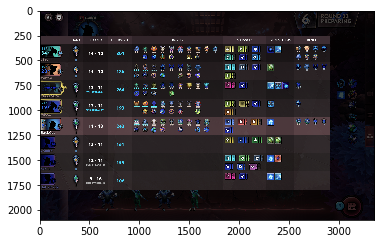

In [151]:
plt.imshow(image)

In [223]:
337 - 1796

-1459

In [210]:
# %%timeit
px_prev = image[265, 0:][0]
x_arr = []
for i, px in enumerate(image[265, 0:]):
    if np.linalg.norm(px-px_prev) == 0:
        continue
    px_prev = px
    x_arr.append(i)
x_arr=x_arr[:7]
# x_arr

px_prev = image[0:, x_arr[2]][0]
y_arr = []
for i, px in enumerate(image[0:, x_arr[2]]):
    if np.linalg.norm(px-px_prev) == 0:
        continue
    px_prev = px
    y_arr.append(i)
# y_arr=y_arr[:7]
y_arr

[4,
 6,
 12,
 14,
 16,
 20,
 22,
 24,
 30,
 34,
 50,
 52,
 60,
 62,
 64,
 66,
 70,
 72,
 74,
 78,
 84,
 86,
 98,
 100,
 102,
 104,
 110,
 114,
 122,
 126,
 128,
 132,
 136,
 138,
 142,
 148,
 150,
 154,
 156,
 160,
 162,
 164,
 166,
 172,
 174,
 176,
 178,
 184,
 194,
 196,
 202,
 206,
 208,
 210,
 220,
 222,
 228,
 232,
 234,
 236,
 238,
 246,
 248,
 250,
 252,
 258,
 260,
 340,
 344,
 346,
 348,
 352,
 356,
 358,
 362,
 364,
 366,
 370,
 374,
 382,
 384,
 390,
 392,
 394,
 400,
 412,
 420,
 422,
 426,
 430,
 432,
 438,
 452,
 454,
 456,
 470,
 472,
 478,
 484,
 504,
 506,
 512,
 514,
 516,
 520,
 522,
 524,
 526,
 530,
 532,
 536,
 544,
 546,
 550,
 570,
 574,
 580,
 588,
 590,
 596,
 614,
 620,
 630,
 652,
 654,
 662,
 666,
 672,
 676,
 682,
 686,
 690,
 696,
 698,
 704,
 706,
 708,
 724,
 728,
 730,
 732,
 738,
 744,
 750,
 754,
 774,
 776,
 778,
 780,
 782,
 784,
 786,
 788,
 790,
 792,
 794,
 796,
 798,
 800,
 802,
 804,
 806,
 812,
 816,
 820,
 830,
 832,
 834,
 842,
 846,
 848,

In [209]:
x_arr[2]

924

In [227]:
xx = range(arr[2]+15, arr[3]-15, 88)

In [228]:
xx

range(939, 1819, 88)

In [232]:
arr[3] - arr[2]

910

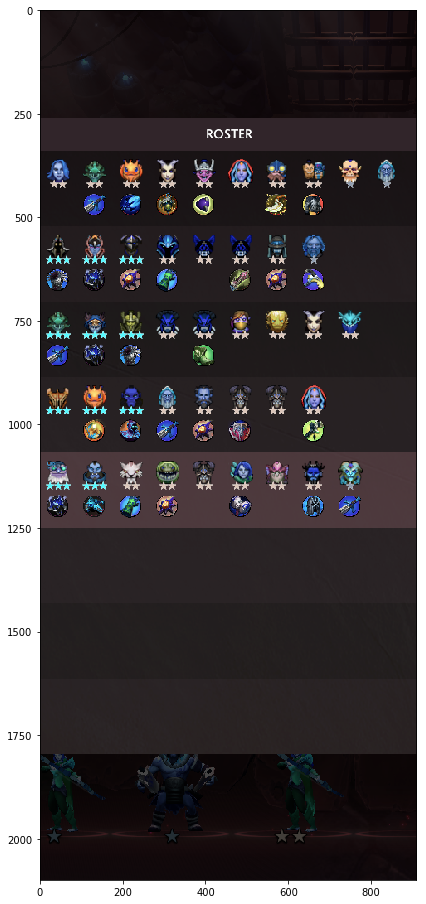

In [236]:
plt.figure(figsize=(16,16))
plt.imshow(image[:, arr[2]:arr[3]-1])

In [203]:
x_start = arr[2]
x_end = arr[3]

In [224]:
y_top

[350, 531, 716, 896, 1078, 1260, 1440, 1620]

In [225]:
y_bot

[438, 619, 804, 984, 1166, 1348, 1528, 1708]

In [75]:
y_top = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 15) if number%2==0]

In [94]:
y_bot = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 16) if number%2==1]

In [51]:
x_left, step, x_rigth = 924, 88, 1804

In [99]:
x = range(x_left, x_rigth, step)

In [139]:
def save_all_icons_from_image(img, y_top, y_bot, x, number_img):
    for number_user in range(len(y_top)):
        for number_pic in range(len(x)):
            crop_img = img[y_top[number_user]:y_bot[number_user], x[number_pic]:x[number_pic]+88]
            cv2.imwrite(f'../dota/crop_image/img{number_img}_{number_user}_{number_pic}.png',crop_img)

In [144]:
def get_all_icons_from_image(img, y_top, y_bot, x):
    all_image = []
    for number_user in range(len(y_top)):
        for number_pic in range(len(x)):
            crop_img = img[y_top[number_user]:y_bot[number_user], x[number_pic]:x[number_pic]+88]
            all_image.append(crop_img)
    return all_image

In [229]:
all_image = get_all_icons_from_image(image, y_top, y_bot, xx)

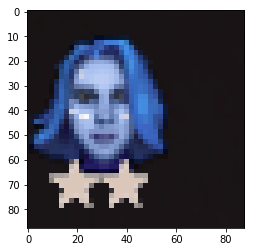

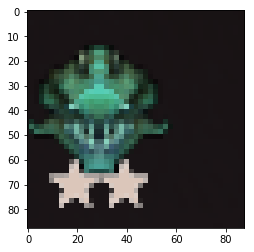

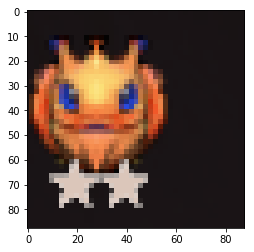

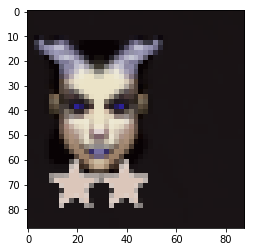

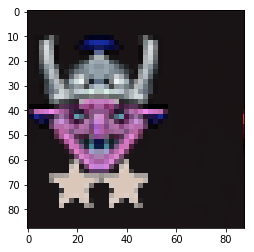

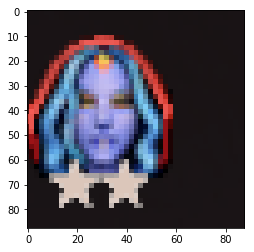

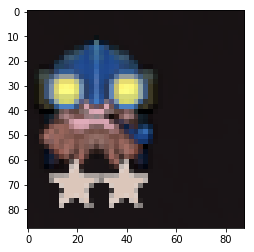

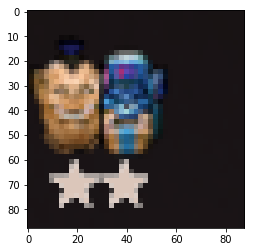

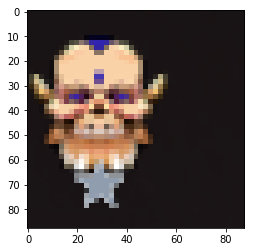

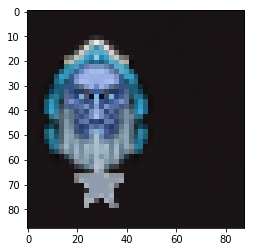

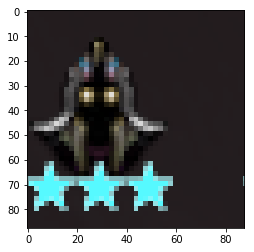

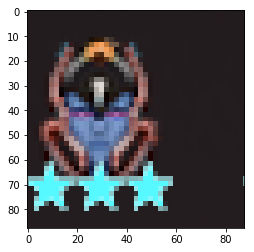

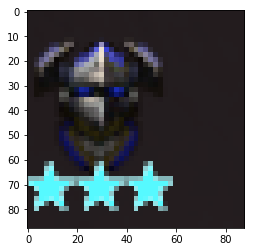

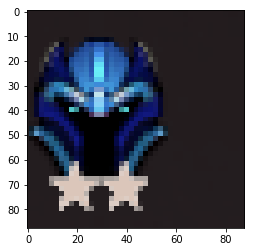

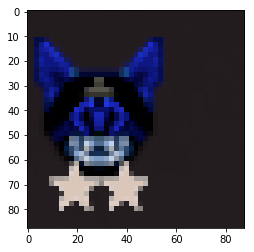

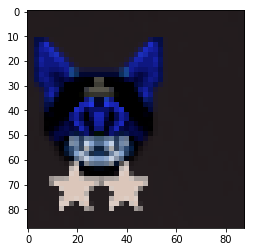

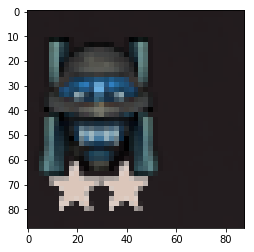

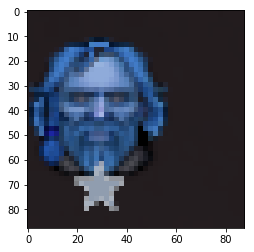

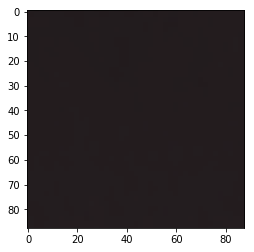

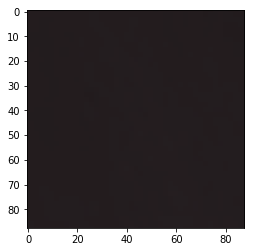

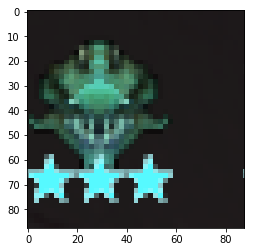

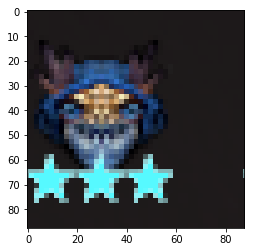

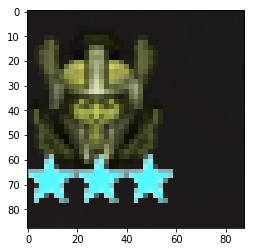

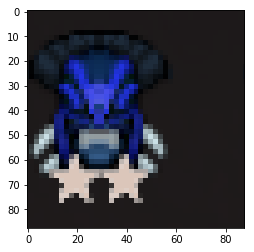

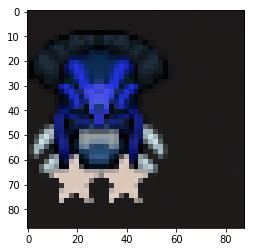

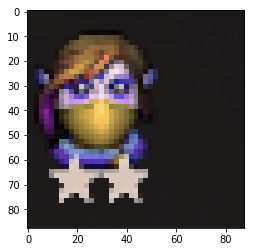

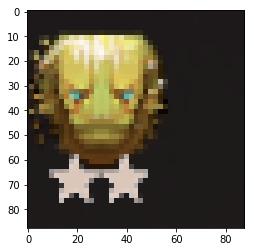

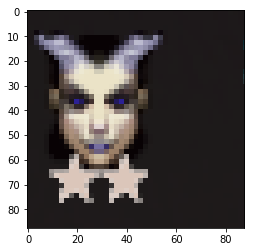

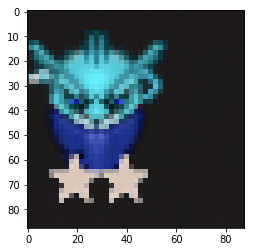

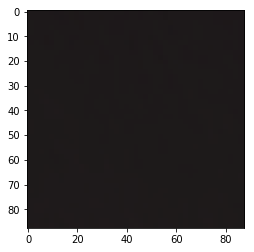

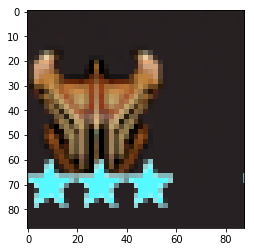

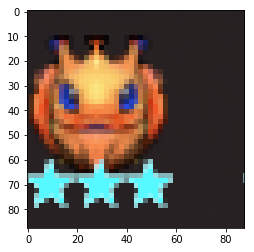

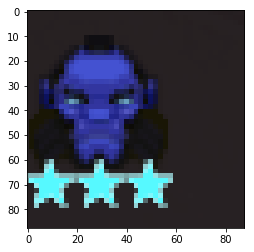

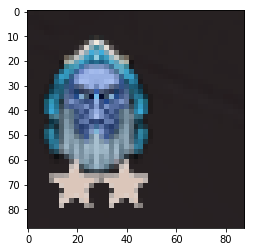

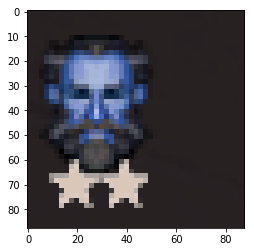

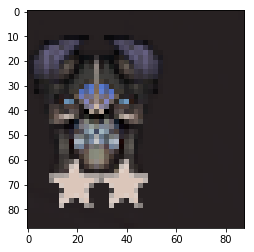

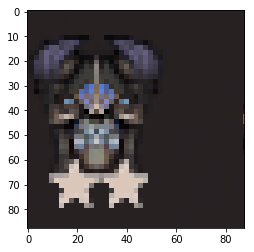

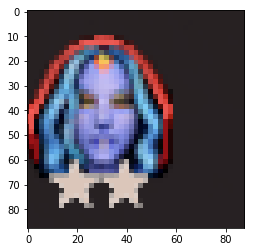

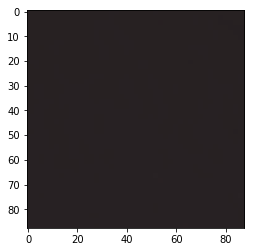

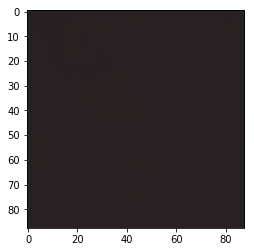

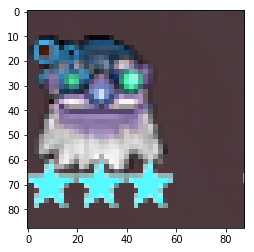

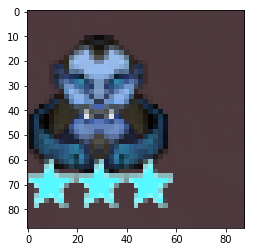

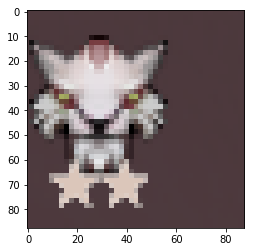

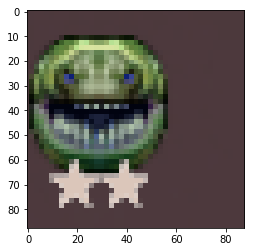

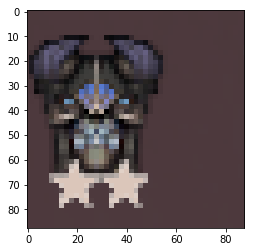

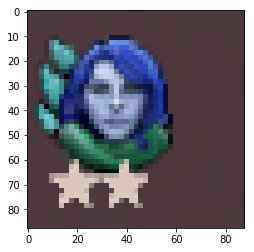

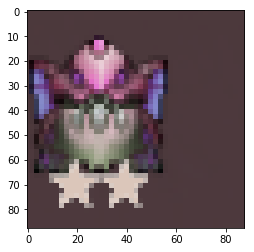

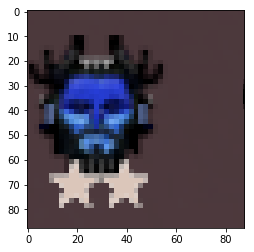

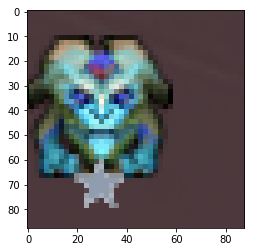

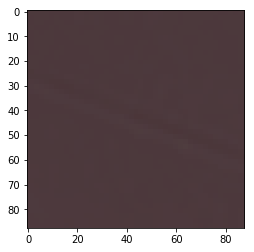

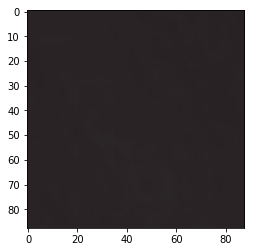

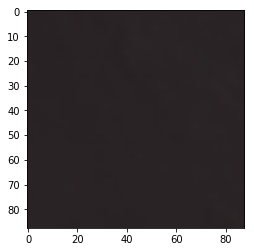

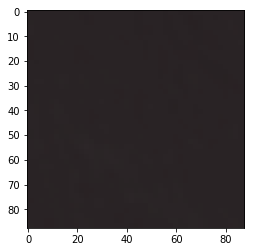

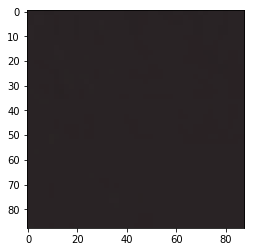

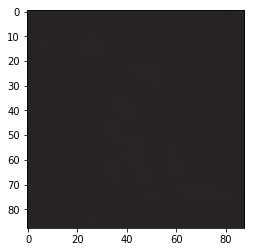

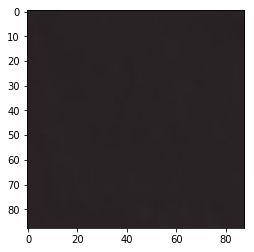

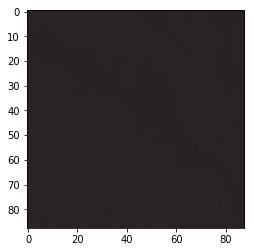

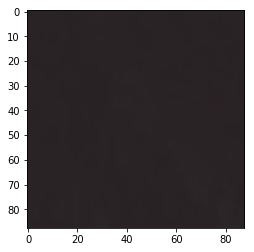

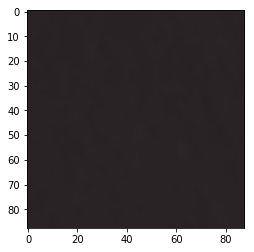

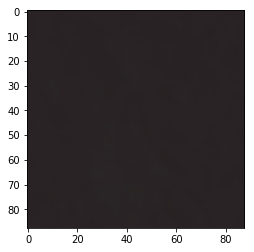

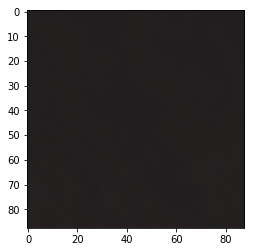

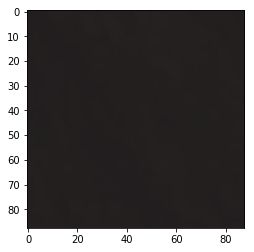

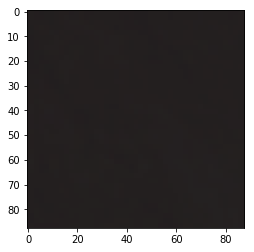

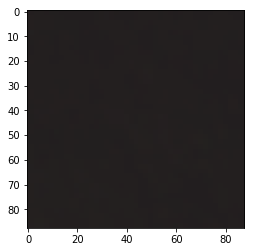

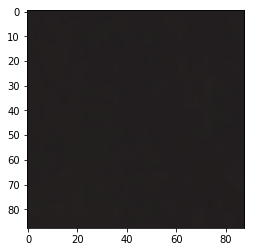

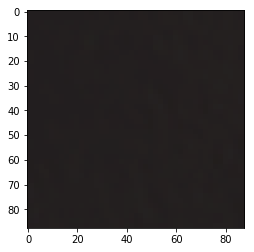

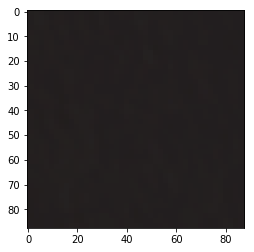

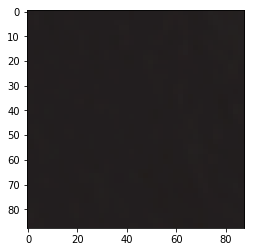

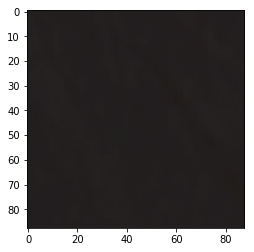

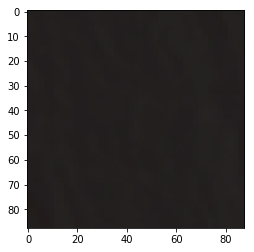

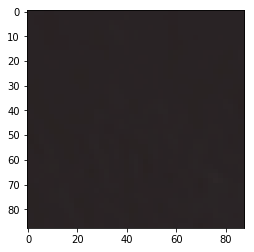

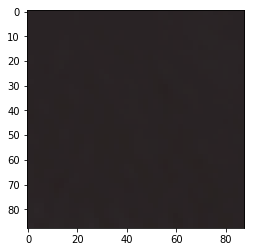

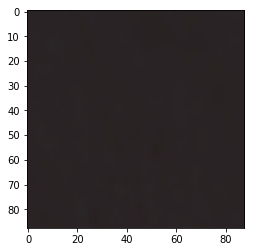

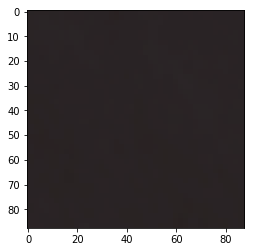

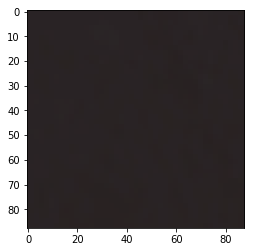

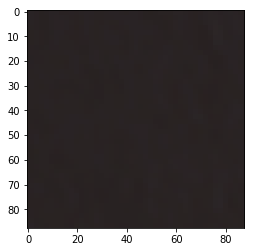

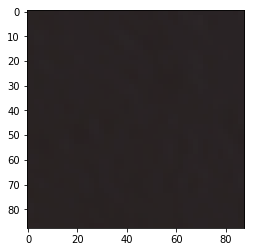

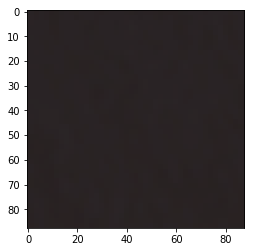

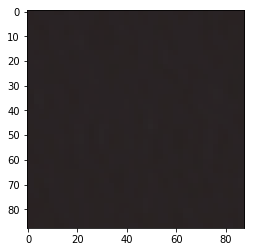

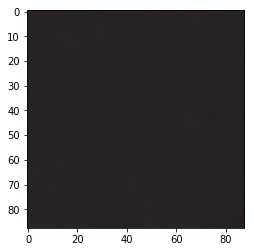

In [230]:
for image in all_image:
    plt.figure()
    plt.imshow(image)
    plt.show()

In [116]:
for number, path in enumerate(path_to_files):
    image = cv2.imread(path)
    save_all_icons_from_image(image, y_top, y_bot, x, number)
    print(f'Image {number} done!')

Image 0 done!
Image 1 done!
Image 2 done!
Image 3 done!
Image 4 done!
Image 5 done!
Image 6 done!
Image 7 done!
Image 8 done!
Image 9 done!
Image 10 done!
Image 11 done!
Image 12 done!


In [122]:
im1 = cv2.imread('/home/redreckless/Рабочий стол/dota/crop_image/img2_6_3.png')
im2 = cv2.imread('/home/redreckless/Рабочий стол/dota/crop_image/img2_7_5.png')

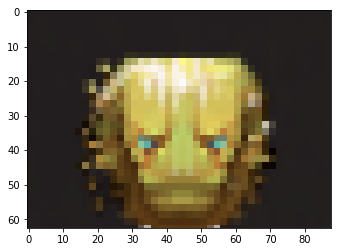

In [134]:
plt.imshow(im1[0:63, 0:88])

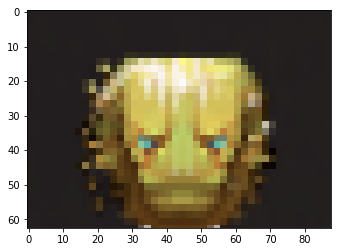

In [135]:
plt.imshow(im1[0:63, 0:88])

In [137]:
(np.linalg.norm(im1[0:63, 0:88]) - np.linalg.norm(im2[0:63, 0:88]))/np.linalg.norm(im2[0:63, 0:88])

-0.010400722037482211

In [138]:
(np.linalg.norm(im1) - np.linalg.norm(im2))/np.linalg.norm(im2)

0.0652810138966795

In [174]:
np.linalg.norm(px-px_prev)

0.0

In [175]:
px

array([61, 46, 52], dtype=uint8)

In [176]:
px_prev

array([61, 46, 52], dtype=uint8)